<a href="https://colab.research.google.com/github/animesh-77/digit-recognizer/blob/master/simple%20CNN/simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) 
(10000, 28, 28) 
(60000,) 
(10000,)


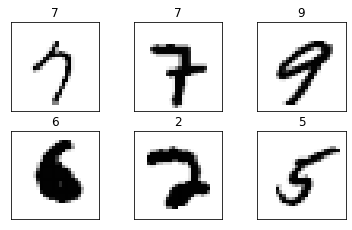

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"{x_train.shape} \n{x_test.shape} \n{y_train.shape} \n{y_test.shape}")
fig, axes= plt.subplots(2,3, sharex= True, sharey= True)

fig.subplots_adjust(hspace=0, wspace=0.4)

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    n= np.random.randint(0,1500)
    ax.set_title(y_train[n])
    ax.imshow(x_train[n][:][:], cmap= "Greys")
plt.show()

## see a few exmples along with the labels

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
def get_CNN_model(input_shape):
    inputs = Input(shape= input_shape)
    layer1= Conv2D(24, 3, 3)(inputs)
    layer2= Conv2D(48, 3, 3)(layer1)
    flatten1= Flatten()(layer2)
    outputs= Dense(10, activation="softmax")(flatten1)

    model= tf.keras.Model(inputs, outputs)
    return model

In [ ]:
model= get_CNN_model((28,28,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 24)          240       
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 48)          10416     
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 10)                4330      
                                                                 
Total params: 14,986
Trainable params: 14,986
Non-trainable params: 0
_________________________________________________________________


We see that output from model is shaped (None, 10). Or for batches=b we have (b,10).
Now our output for training set is shaped (b,) not (b,10).

This is where sparse categorical entropy is used. When we do not have one hot encoded data in output for predicted set.
[Read more](https://cwiki.apache.org/confluence/display/MXNET/Multi-hot+Sparse+Categorical+Cross-entropy)

In [ ]:
model.compile(optimizer= "Adam", loss= "sparse_categorical_crossentropy")

In [ ]:

## training the model on train data
history= model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 14s 3ms/step - loss: 1.0164
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3996
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3681
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3589
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3540
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3499
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3464
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3444
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358
Epoch 12/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3344


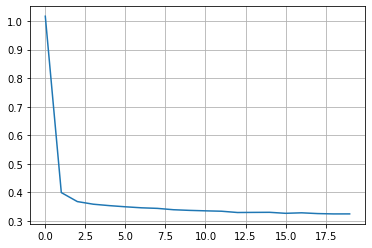

In [ ]:
plt.plot(history.history["loss"])
plt.grid()
plt.show()

In [ ]:
##  Saving the model
model.save("simple_CNN_weights.h5")

1/1 [==============================] - 0s 15ms/step
shape of raw output from model : (1, 10)


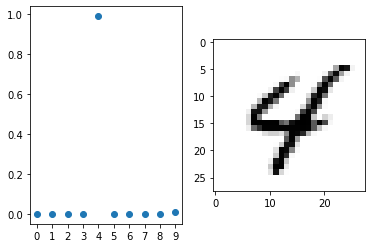

Predicted label : 4, Actual Label : 4


In [ ]:
# Displaying a random image from test dataset and the corresponding prediction from the NN defined above

n = np.random.randint(0, y_test.shape[0])
vals = model.predict(x_train[n][:][:].reshape(1, 28,28))
print(f"shape of raw output from model : {vals.shape}")

vals= vals.reshape(10) # the index with max value is the prediction

fig, ax= plt.subplots(1,2)
ax[0].scatter(np.arange(vals.size) , vals)
ax[0].set_xticks(np.arange(vals.size))

ax[1].imshow(x_train[n], cmap= "Greys")
plt.show()

print(f"Predicted label : {np.argmax(vals)}, Actual Label : {y_train[n]}")


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def sketch_recognition(img):
    ans= model.predict(img.reshape(1, 28,28))
    ans= np.argmax(ans)
    return ans

window= gr.Interface(fn=sketch_recognition, inputs="sketchpad", outputs= "label", live= True)
window.launch(debug= True)

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Sketchpad, please remove them: {'visibile': True}
  warnings.warn(


Hint: Set streaming=True for Sketchpad component to use live streaming.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 14ms/step
Keyboard interruption in main thread... closing server.
